In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fourier(arr, n=5):
    m = len(arr)
    Δx = T / m
    a0 = (arr * Δx).sum() / T
    iΔx = np.arange(m) * Δx
    niΔx = np.arange(1, n+1).reshape(n, 1)@iΔx.reshape(1, m)
    area_a = (arr * np.sin(niΔx) * Δx).sum(axis=1)
    aseq = area_a / np.pi
    area_b = (arr * np.cos(niΔx) * Δx).sum(axis=1)
    bseq = area_b/np.pi
    return a0, aseq, bseq

In [3]:
def fser(a0, aseq, bseq, tarr):
    n = len(aseq)
    n_tarr = tarr * np.arange(1, n+1).reshape(n,1)
    sin_arr = np.sin(n_tarr)
    cos_arr = np.cos(n_tarr)
    f_sin = aseq@sin_arr
    f_cos = bseq@cos_arr
    f_values = a0 + f_sin + f_cos
    return f_values

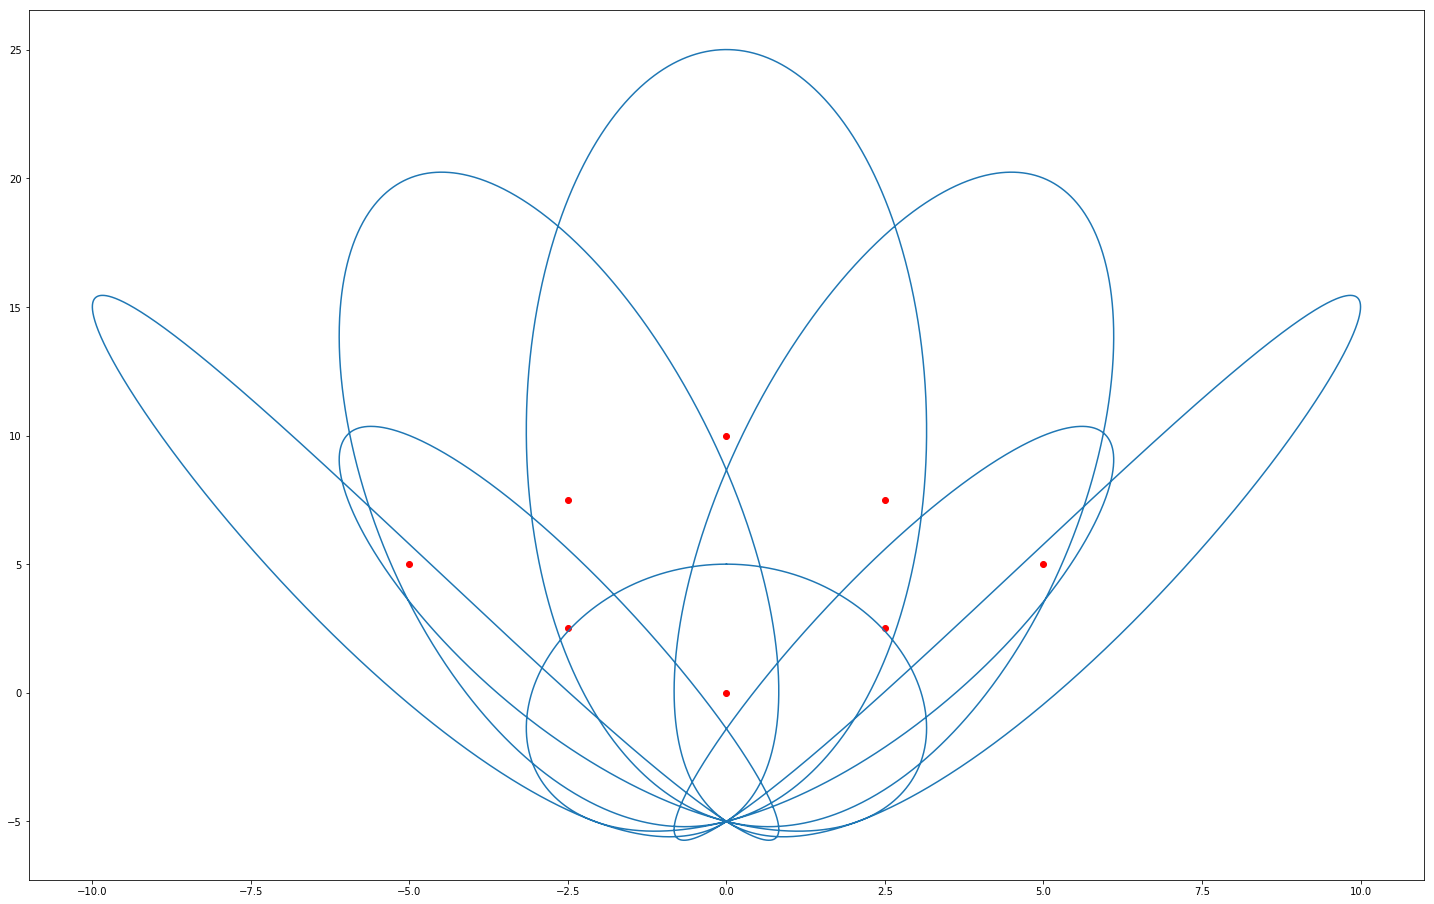

In [4]:
T = 2 * np.pi
body = np.array([(0.0, 0.0), (2.5, 2.5), (5.0, 5.0), (2.5, 7.5), (0.0, 10.0), (-2.5, 7.5), (-5.0, 5.0), (-2.5, 2.5)])
bodyx = body[:, 0]
bodyy = body[:, 1]
xa0, xaseq, xbseq = fourier(bodyx, n=8)
ya0, yaseq, ybseq = fourier(bodyy, n=8)
tarr = np.linspace(0, 2 * np.pi, 10000)
fx = fser(xa0, xaseq, xbseq, tarr)
fy = fser(ya0, yaseq, ybseq, tarr)
ax = plt.gca()
ax.figure.set_size_inches(25, 16)
plt.plot(fx, fy)
plt.scatter(bodyx, bodyy, c='r')
plt.show()

![Alt text](img/flower.jpg)